In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
def resize_images(img_path, re_img_path):
    images = glob.glob(img_path + "1/*.jpg")
    print(len(images), " images to be resized.")
    # 파일마다 모두 100x100 사이즈로 바꾸어 저장합니다.
    target_size=(100,100)
    iter = 0
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(re_img_path + "/{}.jpg".format(iter))
        iter += 1
    
    print(len(images), " images resized.")
    
image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/scissors"
re_image_path = "/aiffel/aiffel/rock-scissors-paper/image/train/scissors"
resize_images(image_dir_path, re_image_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/rock"
re_image_path = "/aiffel/aiffel/rock-scissors-paper/image/train/rock"
resize_images(image_dir_path, re_image_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/paper"
re_image_path = "/aiffel/aiffel/rock-scissors-paper/image/train/paper"
resize_images(image_dir_path, re_image_path)
print("보 이미지 resize 완료!")

1712  images to be resized.
1712  images resized.
가위 이미지 resize 완료!
2040  images to be resized.
2040  images resized.
바위 이미지 resize 완료!
1640  images to be resized.
1640  images resized.
보 이미지 resize 완료!


In [3]:
def load_data(img_path, number_of_data=5392):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.glob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.glob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.glob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/train/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#검증데이터
x_valid = np.zeros(200*100*100*3,dtype=np.int32).reshape(200,100,100,3)
y_valid = labels=np.zeros(200,dtype=np.int32)

for i in range(200):
    r = np.random.randint(1, 5392)
    x_valid[i] = x_train[r]
    y_valid[i] = y_train[r]
    
print("x_valid shape: {}".format(x_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

학습데이터(x_train)의 이미지 개수는 5392 입니다.
x_train shape: (5392, 100, 100, 3)
y_train shape: (5392,)
x_valid shape: (200, 100, 100, 3)
y_valid shape: (200,)


0
라벨 개수 : [1712, 2040, 1640]


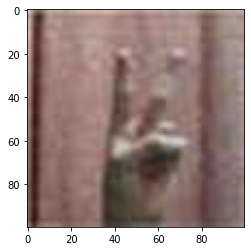

In [4]:
#트레인데이터 '가위'확인
plt.imshow(x_train[1000])
print(y_train[1000])
list_y = [0, 0, 0]
for i in range(len(y_train)):
    list_y[y_train[i]] += 1
print("라벨 개수 : {}".format(list_y))

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [127]:
n_channel_1 = 16
n_channel_2 = 32
n_channel_3 = 50
n_channel_4 = 64
n_channel_5 = 50
n_dense = 32
n_train_epoch = 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_4, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_5, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  13
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_176 (MaxPoolin (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 21, 21, 50)        14450     
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 10, 10, 50)        0         
_________________________________________________________________
conv2d_178 (Conv2D)         

In [128]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, validation_split=0.2, shuffle=True, epochs=n_train_epoch)

Epoch 1/3
135/135 [==============================] - 2s 12ms/step - loss: 0.6350 - accuracy: 0.7287 - val_loss: 0.5363 - val_accuracy: 0.7637
Epoch 2/3
135/135 [==============================] - 1s 8ms/step - loss: 0.1050 - accuracy: 0.9678 - val_loss: 0.3285 - val_accuracy: 0.8610
Epoch 3/3
135/135 [==============================] - 1s 8ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.0171 - val_accuracy: 0.9954


In [8]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 100x100 사이즈로 바꾸어 저장합니다.
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/test/scissors1"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
96  images to be resized.
96  images resized.
바위 이미지 resize 완료!
90  images to be resized.
90  images resized.
보 이미지 resize 완료!


In [11]:
def load_data(img_path, number_of_data=286):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("실험데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/aiffel/aiffel/rock-scissors-paper/image/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

실험데이터(x_train)의 이미지 개수는 286 입니다.
x_test shape: (286, 100, 100, 3)
y_test shape: (286,)


0


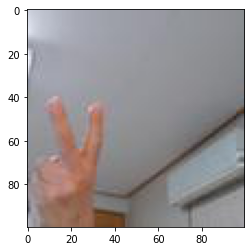

In [12]:
#테스트데이터 '가위'확인
plt.imshow(x_test[80])
print(y_train[80])

In [129]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

9/9 - 0s - loss: 137.3805 - accuracy: 0.8007


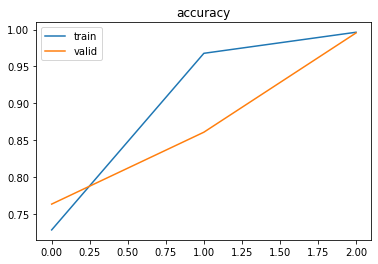

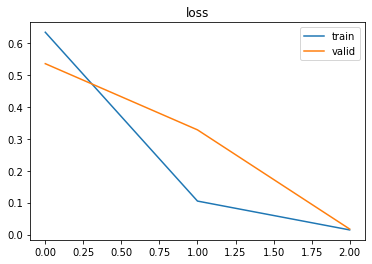

In [130]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()
plt.title("accuracy")
plt.show()

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="valid")
plt.legend()
plt.title("loss")
plt.show()

## 결론

### 데이터
### 트레인셋은 케글의 https://www.kaggle.com/datasets/anirudhabhagwat/rock-paper-scissors-images 를 참고하였고
### 테스트셋의 그루중 심한준님과 이경환님의 데이터를 참고하였습니다.
### 데이터 중 가위에 관한 데이터는 트레인셋에서 검지와 중지를 사용하였지만, 한준님의 경우 엄지와 약지를 사용하였기에
### 경환님의 데이터중 '가위'의 경우만 가져왔습니다.
### 결과적으로 케글을 전체 트레인셋에 한준님의 '바위'와 '보자기', 경환님의 '가위'를 테스트셋으로 사용하였습니다

### 에폭
### 데이터의 특성상 연속된 동작속에 캡쳐된 손모양이 사용되기 때문에 유사한 모양의 데이터가 많았습니다. 그로 인해 에폭이 높아졌을때 
### 오히려 검증데이터의 정확도는 올라가지만 테스트데이터의 정확도는 내려가는 오버피팅이 발생하는 듯 보였습니다.
### 에폭을 역으로 감소시켜준 뒤에 테스트셋과 검증데이터의 정확도를 어느정도 맞춰줄 수 있었습니다.

### 레이어
### 처음 학습시에는 4개의 층으로 설계하여 모델링을 진행하였습니다. 결과는 테스트데이터의 정확도가 매우 떨어졌기에 더 깊은층으로
### 모델을 재설계하였습니다. 11계층 ,13계층으로 레이어를 증가시킬때 마다 정확도가 조금씩 향상되었기에 딥러닝에서 깊은 학습의 
### 중요성에 대해 파악할 수 있었습니다.

### 하이퍼 파라미터
### 더 깊은 층으로 모델을 학습시켰지만 여전히 목표한 0.75이상의 정확도를 갖기는 어려웠습니다. 각 층의 채널 수를 조절해가며 학습을
### 진행시켜보았습니다. 많은 경우의 수가 있기에 가장 좋은 결과를 얻기에는 쉽지 않았습니다만, 이때부터 0.7의 정확도를 넘어가는
### 모델을 찾기 시작했습니다.
### 결과적으로 위의 모델링을 적용했을 경우 레이어가 깊고 채널수가 많을수록 더 좋은 정확도를 얻을 수 있었고, 0.80의 정확도를
### 갖는 모델을 얻을 수 있었습니다.
